<a href="https://colab.research.google.com/github/mansigith/idc409/blob/main/IDC409.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

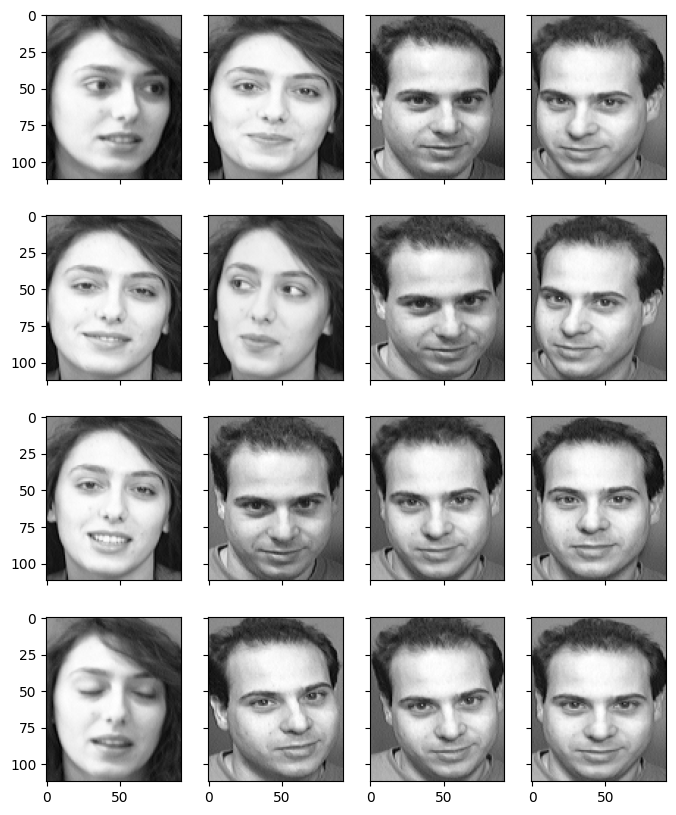

Face image shape: (112, 92)
Number of classes: 40
Number of images: 400


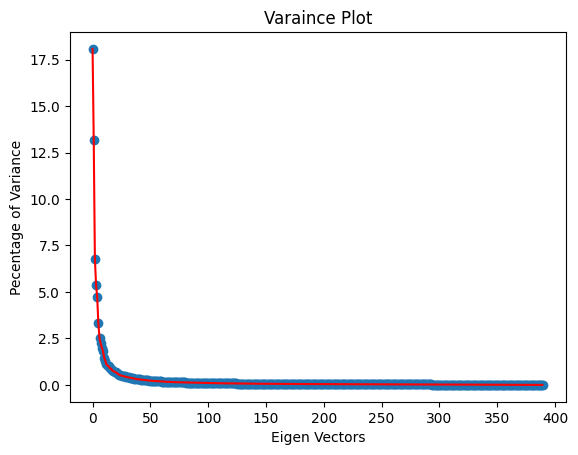

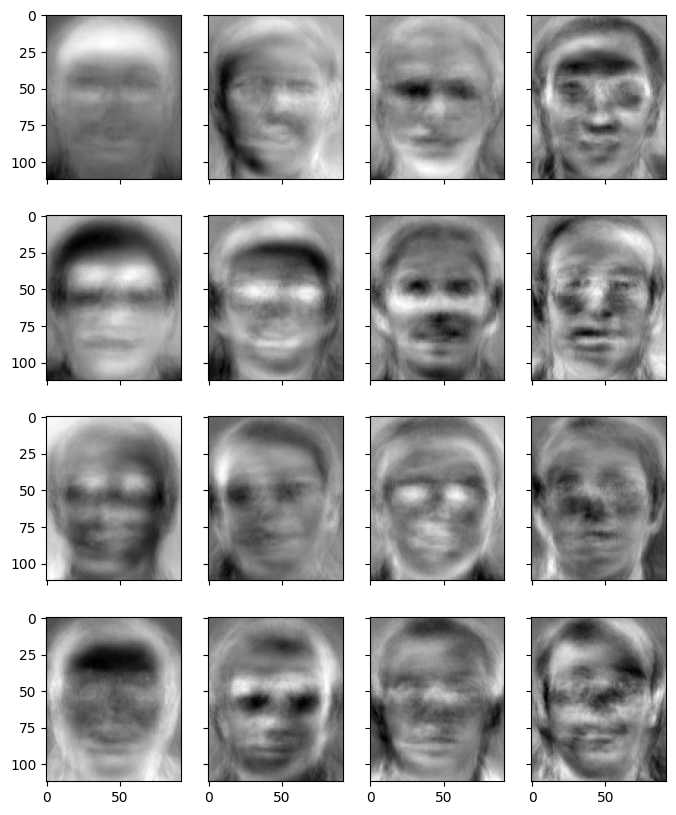

Best match s3 with Euclidean distance 0.000000


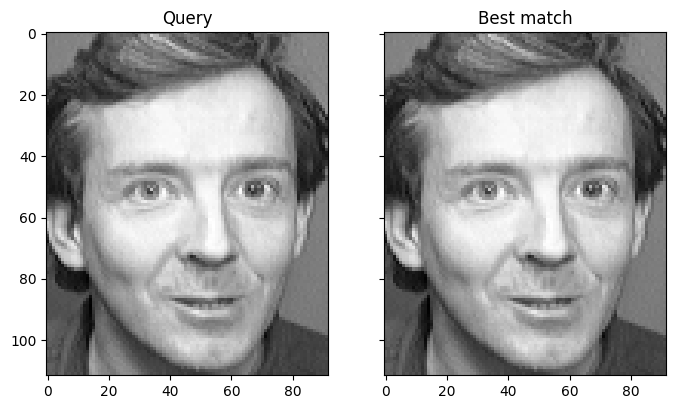

In [2]:

#CODE FOR IMAGE COMPRESSION BY PCA
# CV2 is the updated version of OpenCV
# OpenCV (Open Source Computer Vision Library: http://opencv.org) is an open-source library that includes
# several hundreds of computer vision algorithms.
import cv2
# ZIPFILE to get all the contents from the zip file without extracting all the files which might cause the storage error
import zipfile
# Numpy to perform all the array related functions
import numpy as np
#Getting all the face data files in the dictionary called faces which will include the images and labels of the face-dataset
faces = {}
with zipfile.ZipFile("face-dataset.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

import matplotlib.pyplot as plt
# Showing the images in the greysacle value


fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[384:400]
# Showing only 16 images due to lack to space
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
plt.show()

# Getting the dimensions of the image used in the project
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

#Retrieving different classes and adding that to the classes and faces lists
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

# Take classes 1-39 for eigenfaces, keep entire class 40 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s8/"):
        continue # this is our test set
    if key == "s8/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

# Creating a NxM matrix with N images and M pixels per image
facematrix = np.array(facematrix)

# Apply PCA and take first K principal components as eigenfaces
# Apply PCA to extract eigenfaces
from sklearn.decomposition import PCA

pca = PCA().fit(facematrix)



# PLotting the variance to get the idea of how many eigenvectors to choose for image recognition

plt.scatter(np.linspace(0,390,390),(pca.explained_variance_ratio_)*100)
plt.plot((pca.explained_variance_ratio_)*100,'r')
plt.xlabel('Eigen Vectors')
plt.ylabel('Pecentage of Variance')
plt.title('Varaince Plot')
plt.show()

# Taking the first K principal components as eigenfaces
n_components = 200
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()

# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T

# Test on out-of-sample image of existing class
query = faces["s3/10.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
if (euclidean_distance[best_match]<1500):
    print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
    # Visualize
    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
    axes[0].imshow(query.reshape(faceshape), cmap="gray")
    axes[0].set_title("Query")
    axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()
else:
    print("No best match was found withing the threshold")



Code for Harr-cascade algorithm to detect faces from a group photo


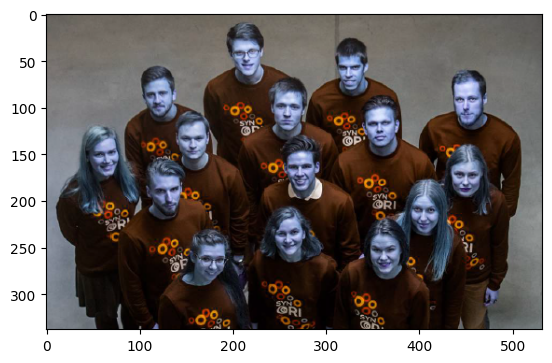

Found 15 faces!


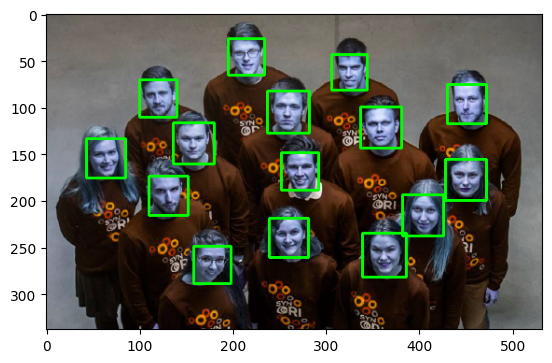

In [17]:
import cv2
import matplotlib.pyplot as plt
# Get user supplied values
imagePath = "try-7.png"
cascPath = "haarcascade_frontalface_default.xml"

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

# Read the image
image = cv2.imread(imagePath)

plt.imshow(image)
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = faceCascade.detectMultiScale(
   gray,
   scaleFactor=1.1,
   minNeighbors=5,
   minSize=(30, 30),
   flags = cv2.CASCADE_SCALE_IMAGE #flags = cv2.cv.CV_HAAR_SCALE_IMAGE
)


print("Found {0} faces!".format(len(faces)))



# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)


plt.imshow(image)
plt.show()